In [1]:
import torch
import torchvision
from networks.VAE import VAE_3hl
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold, train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


C:\ProgramData\Miniconda3\envs\DataAugmentationVAE\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Original data

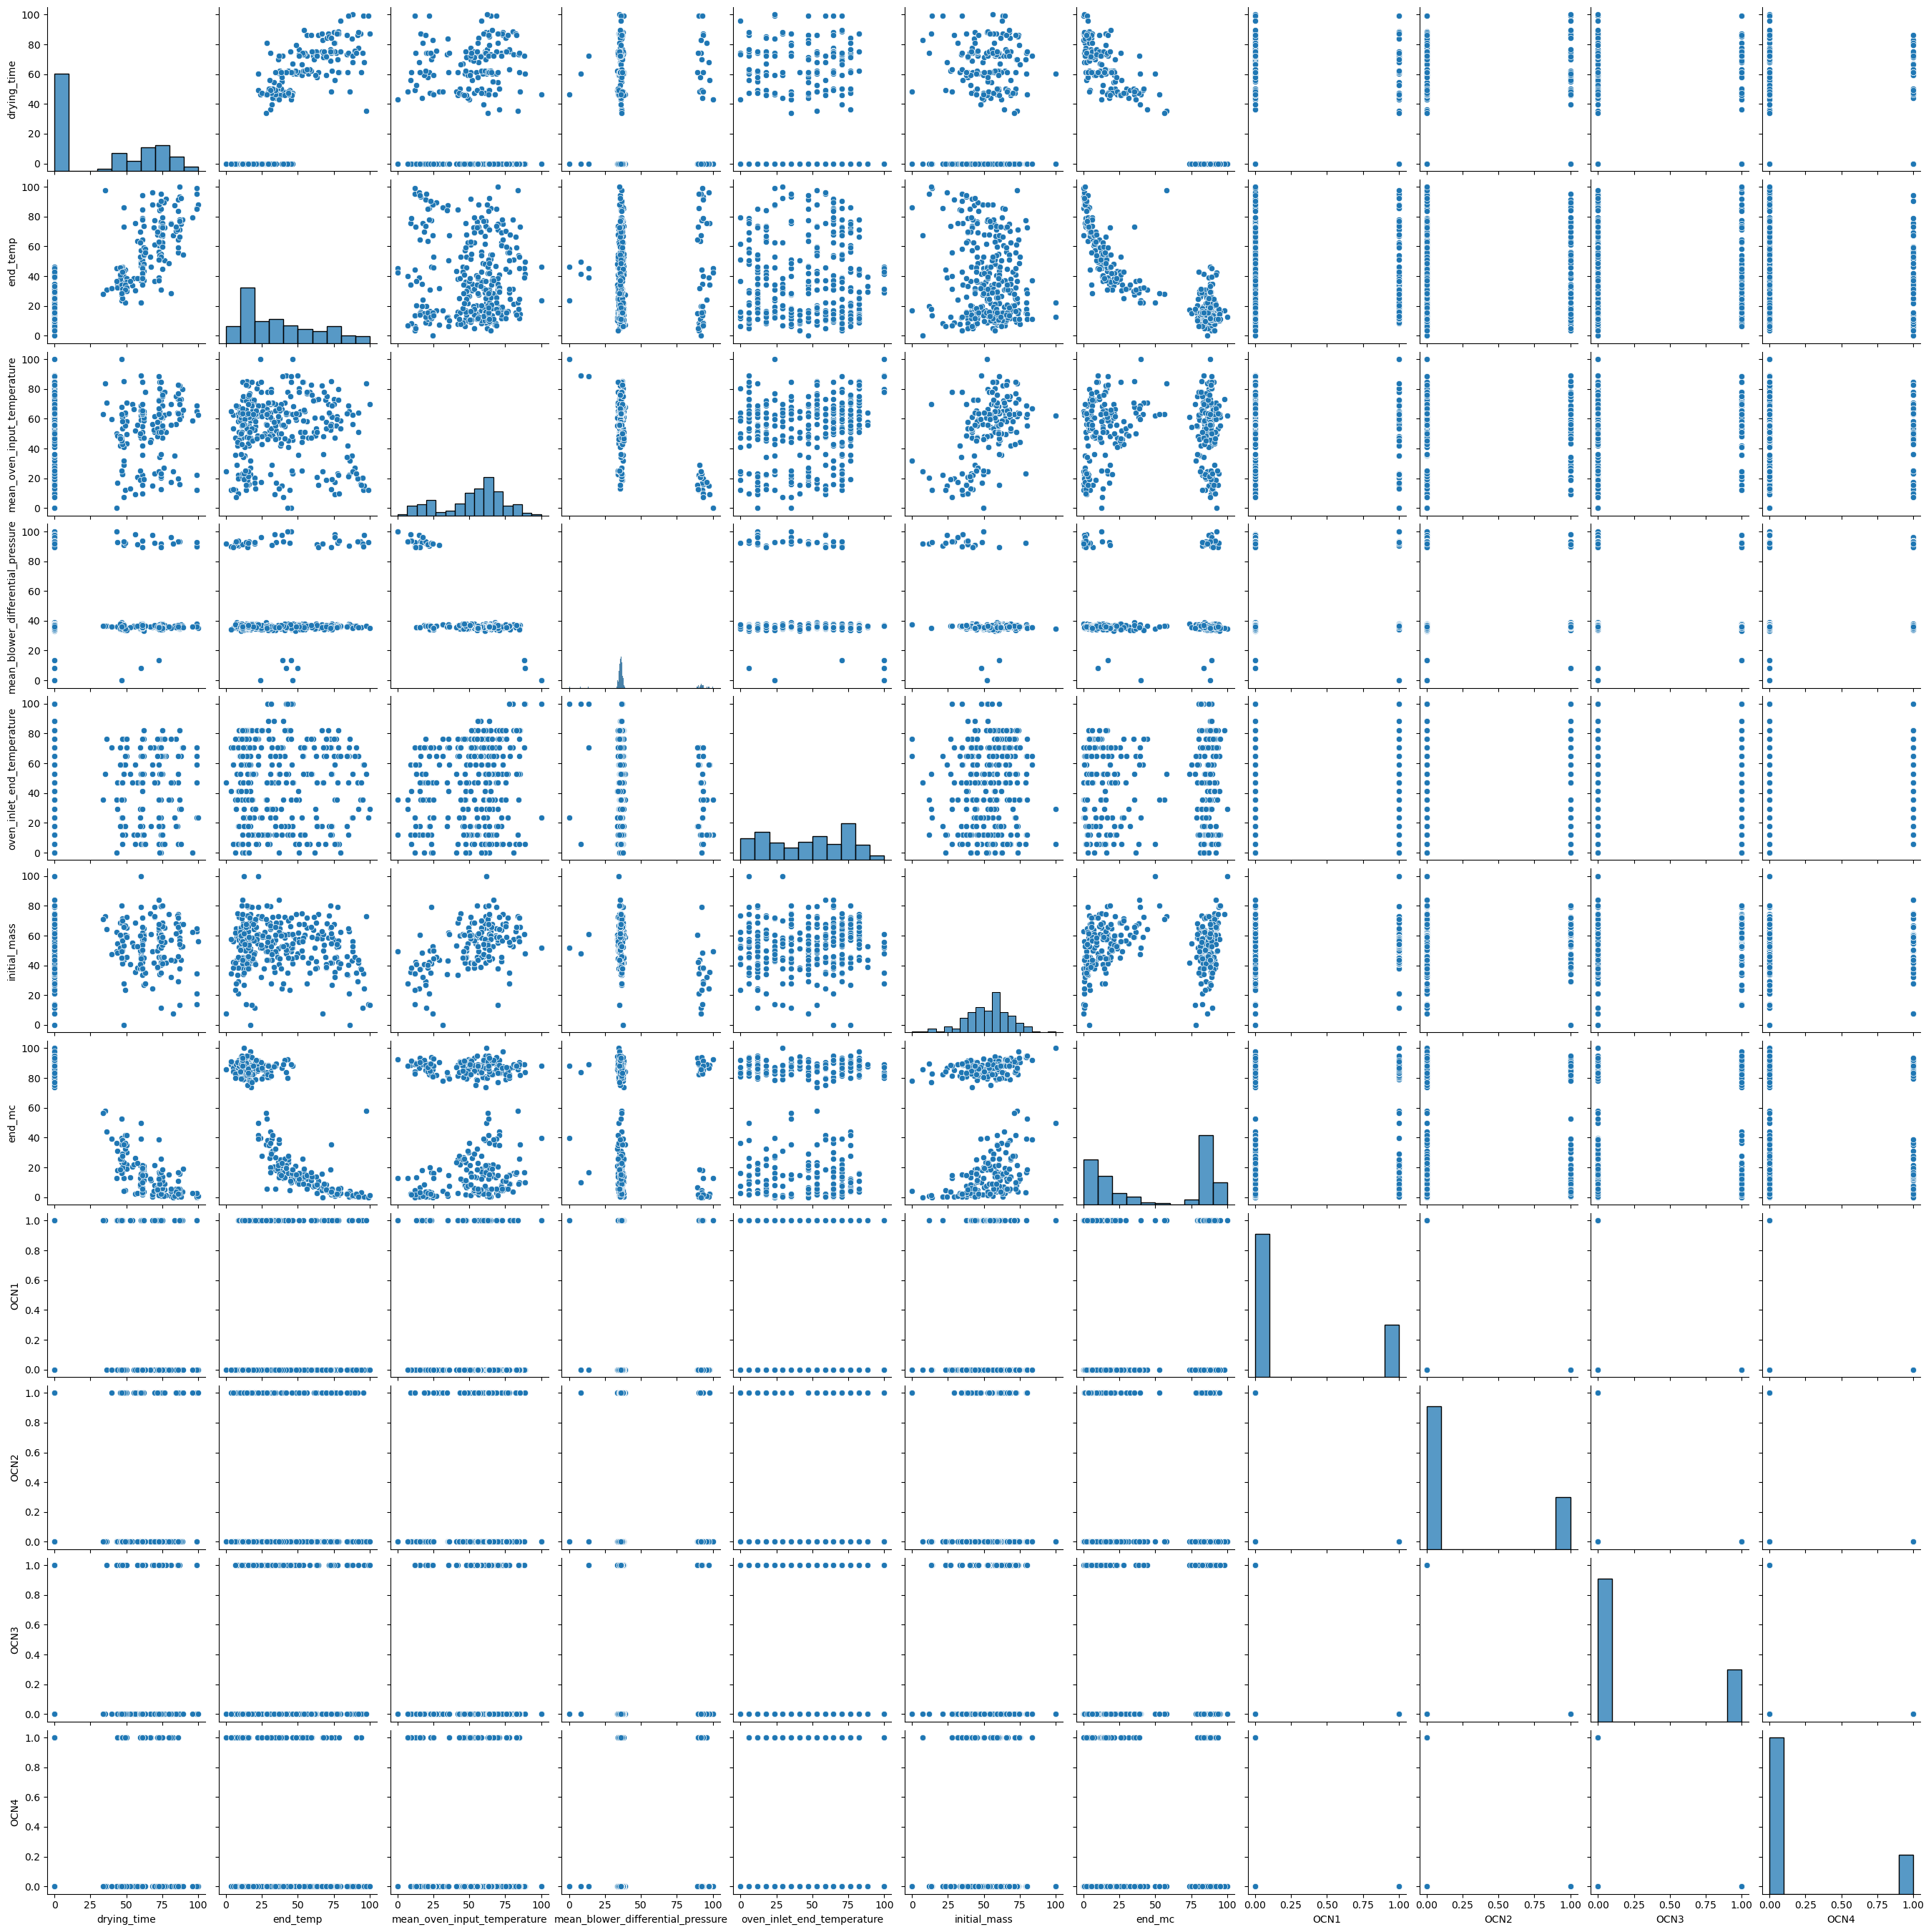

In [2]:
original_data = pd.read_csv("dataset.csv")
orig_data_df = original_data [["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","oven_chamber_position"]]
ocps = pd.get_dummies(orig_data_df["oven_chamber_position"]).rename(columns={1:"OCN1",2:"OCN2",3:"OCN3",4:"OCN4"})
orig_data_df = pd.concat([orig_data_df, ocps],axis=1)
orig_data_df = orig_data_df.drop(columns=["oven_chamber_position"])
sns.pairplot(orig_data_df)
plt.show()

<Figure size 640x480 with 0 Axes>

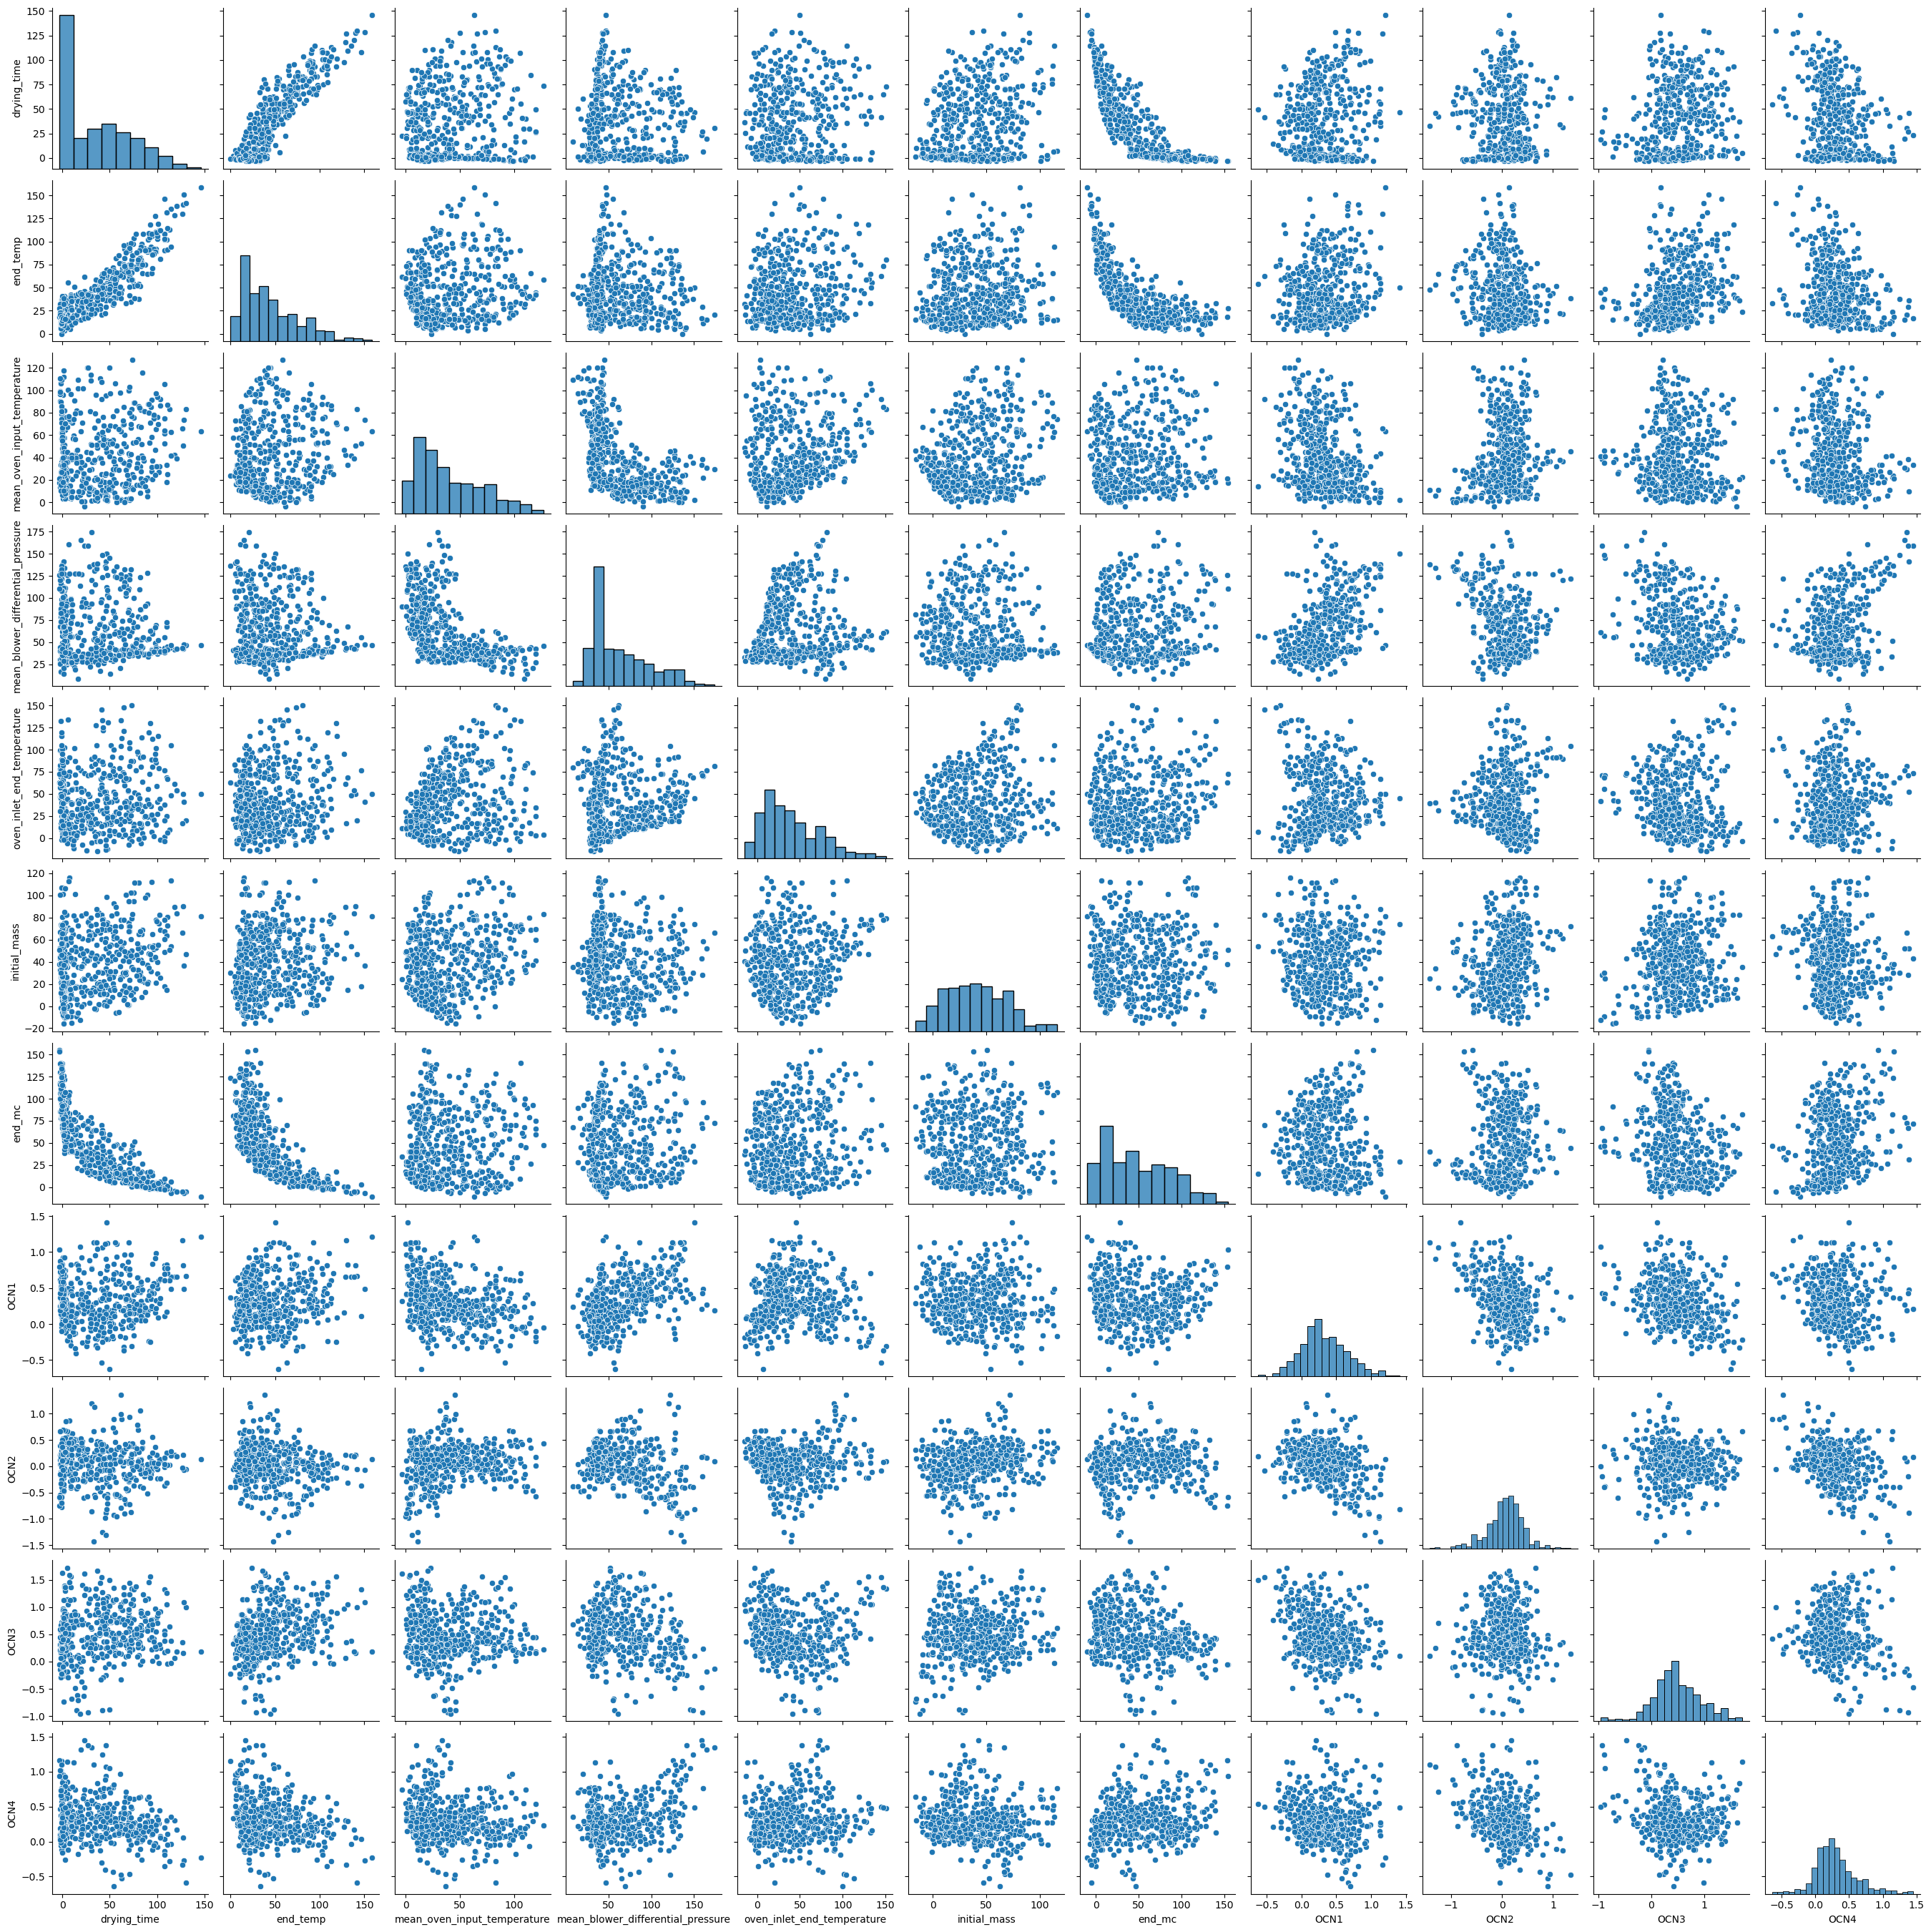

In [6]:
original_data = pd.read_csv("dataset.csv")
orig_data_df = original_data [["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","oven_chamber_position"]]
ocps = pd.get_dummies(orig_data_df["oven_chamber_position"]).rename(columns={1:"OCN1",2:"OCN2",3:"OCN3",4:"OCN4"})
orig_data_df = pd.concat([orig_data_df, ocps],axis=1)
orig_data_df = orig_data_df.drop(columns=["oven_chamber_position"])

vae = torch.load("trained_models/4d-exp0.pt")


encoded_data = vae.encoder(torch.tensor(orig_data_df.values).float())

# Draw random samples from the latent distribution as spanned by original data.
dims=4
samples = []
for dim in range(dims):
    dim_min = (encoded_data.detach().numpy())[:,dim].min()
    dim_max = (encoded_data.detach().numpy())[:,dim].max()
    samples.append((dim_max - dim_min)*np.random.rand(500)+dim_min)
    
random_samples = np.transpose(np.array(samples))

# decode the random samples:
data = vae.decoder(torch.tensor(random_samples).float()).detach().numpy()

col_names = ["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","OCN1","OCN2","OCN3","OCN4"]
data_df = pd.DataFrame(data,columns=col_names)

plt.figure()
sns.pairplot(data_df)
plt.show()

<Figure size 640x480 with 0 Axes>

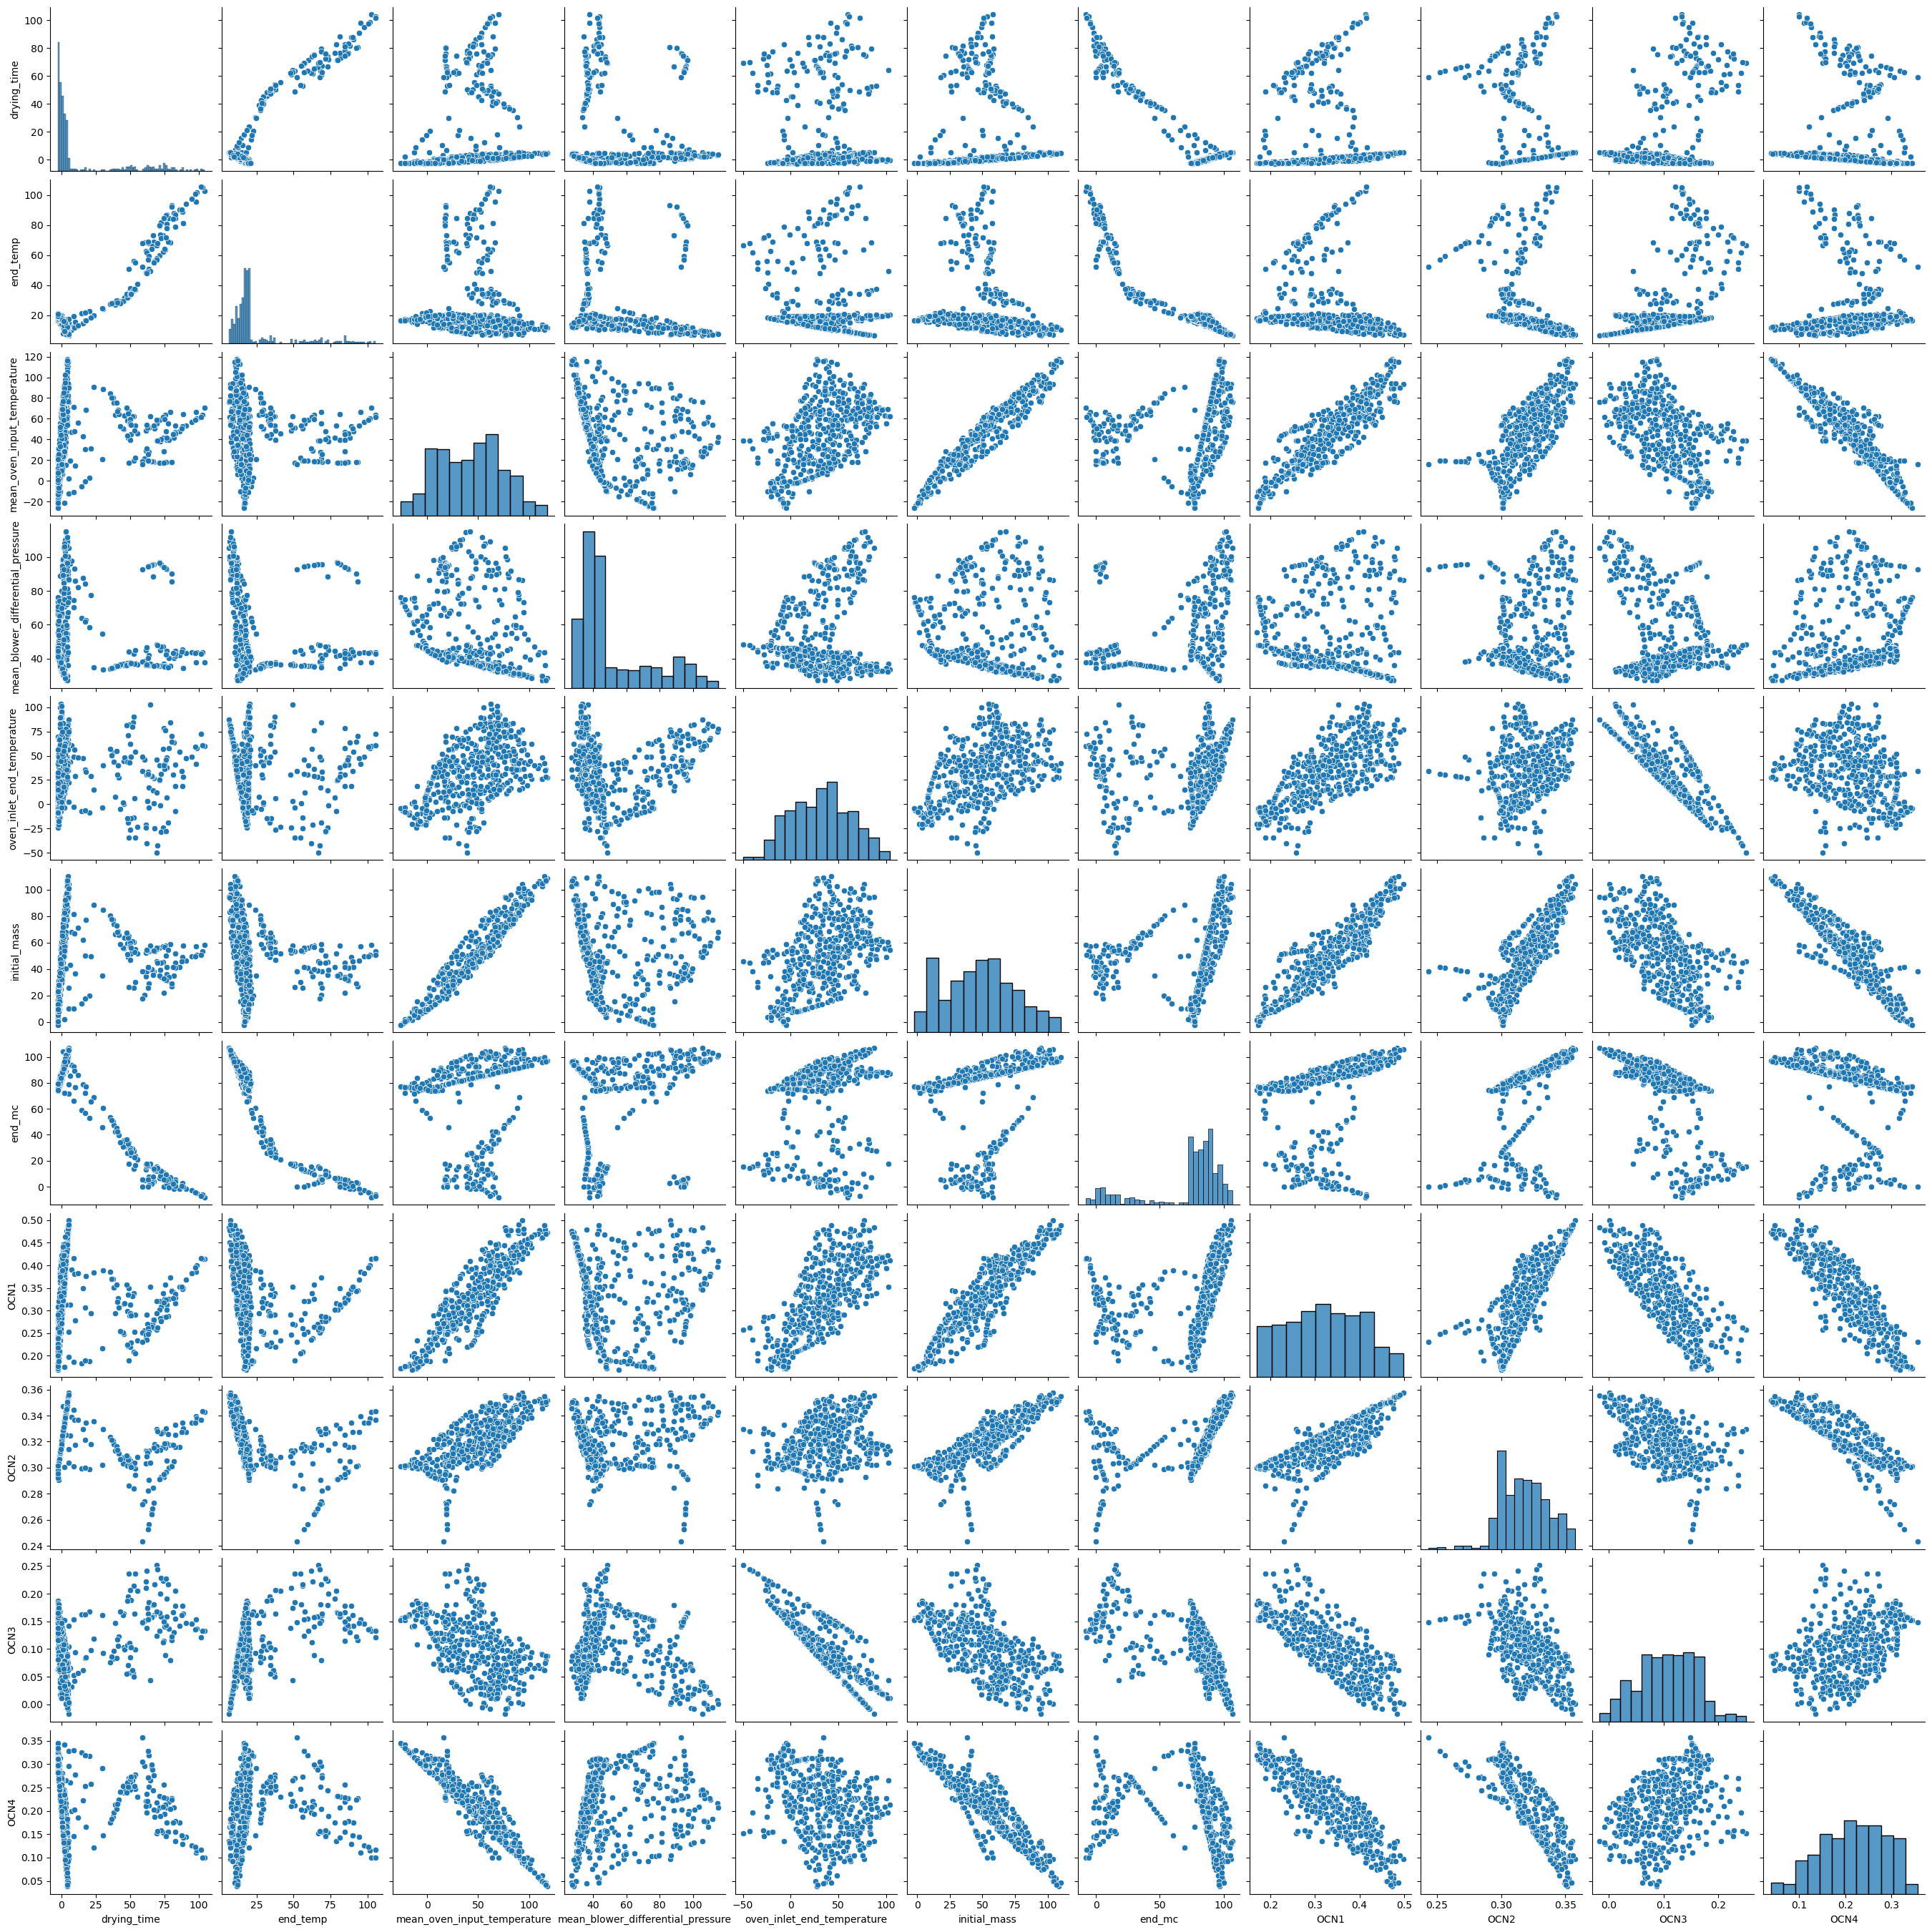

In [64]:
original_data = pd.read_csv("dataset.csv")
orig_data_df = original_data [["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","oven_chamber_position"]]
ocps = pd.get_dummies(orig_data_df["oven_chamber_position"]).rename(columns={1:"OCN1",2:"OCN2",3:"OCN3",4:"OCN4"})
orig_data_df = pd.concat([orig_data_df, ocps],axis=1)
orig_data_df = orig_data_df.drop(columns=["oven_chamber_position"])

vae = torch.load("trained_models/3d-exp6.pt")


encoded_data = vae.encoder(torch.tensor(orig_data_df.values).float())

# Draw random samples from the latent distribution as spanned by original data.
dims=3
samples = []
for dim in range(dims):
    dim_min = (encoded_data.detach().numpy())[:,dim].min()
    dim_max = (encoded_data.detach().numpy())[:,dim].max()
    samples.append((dim_max - dim_min)*np.random.rand(500)+dim_min)
    
random_samples = np.transpose(np.array(samples))

# decode the random samples:
data = vae.decoder(torch.tensor(random_samples).float()).detach().numpy()

col_names = ["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","OCN1","OCN2","OCN3","OCN4"]
data_df = pd.DataFrame(data,columns=col_names)

plt.figure()
sns.pairplot(data_df)
plt.show()

# 5D

<Figure size 640x480 with 0 Axes>

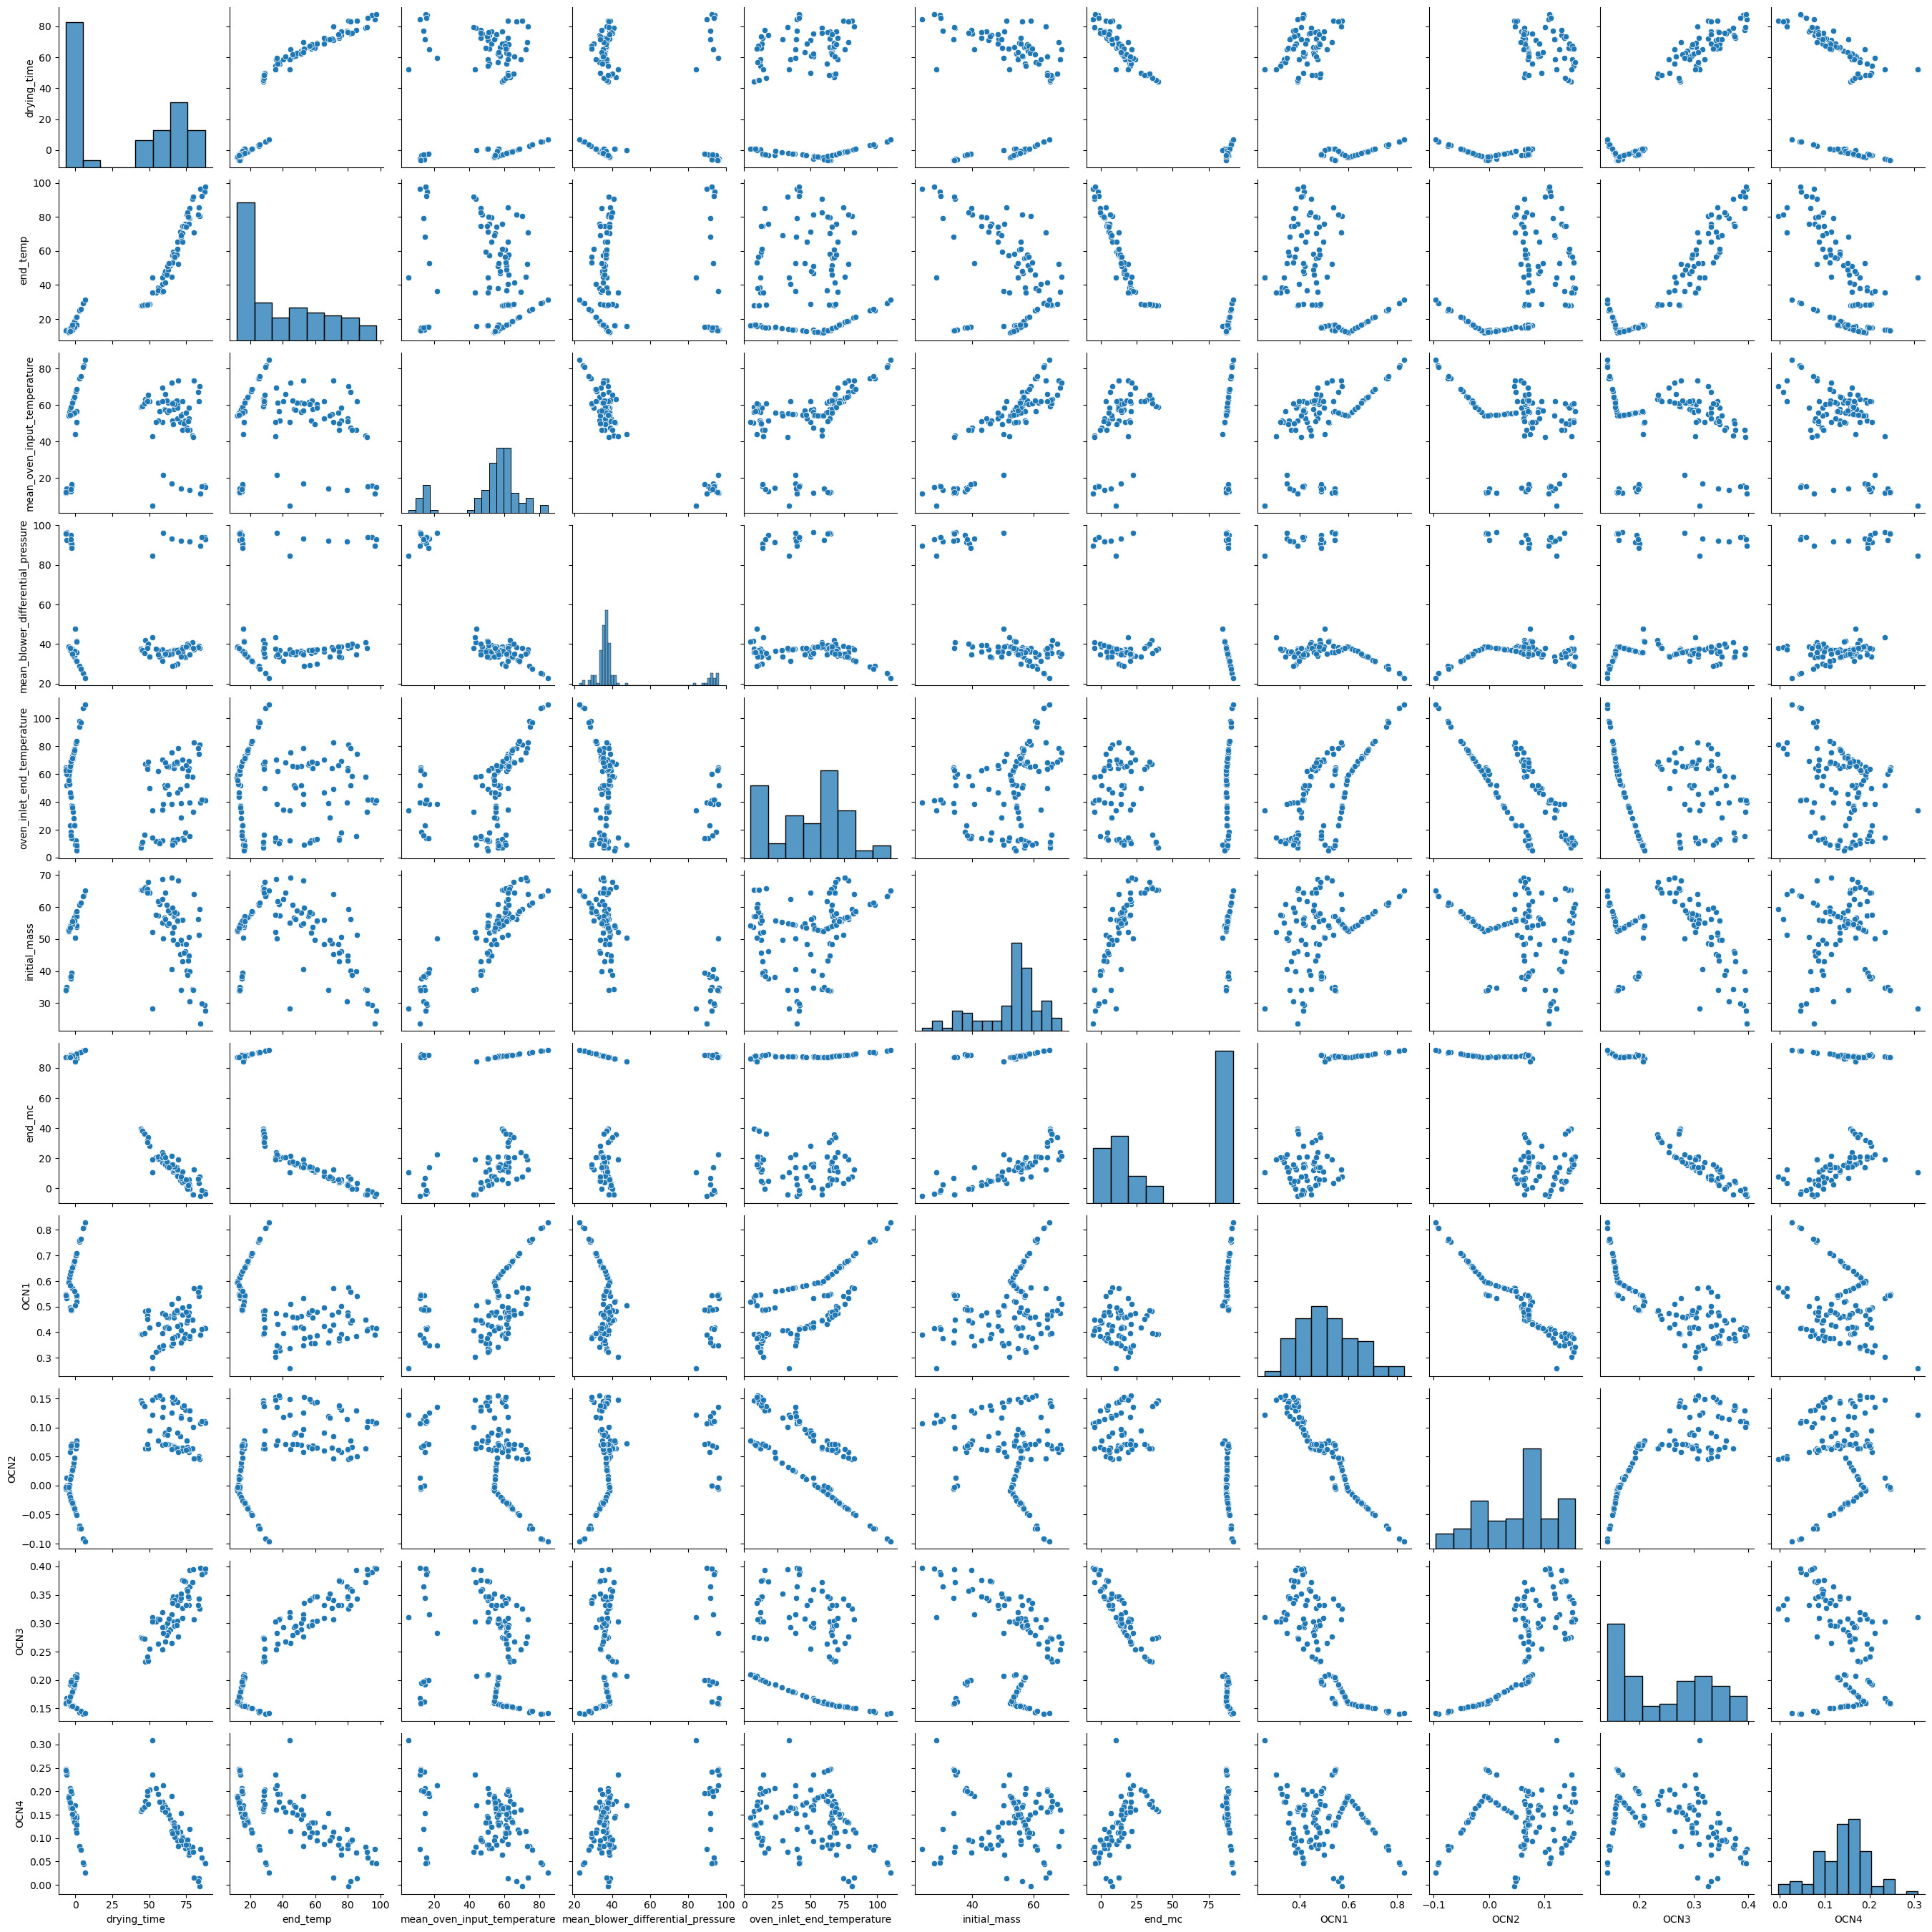

In [2]:
vae = torch.load("5d-exp1.pt")

sample = vae.draw_sample()
sample = sample.float()

generated_data = vae.decoder(sample)

data = generated_data.detach().numpy()
col_names = ["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","OCN1","OCN2","OCN3","OCN4"]
data_df = pd.DataFrame(data,columns=col_names)

plt.figure()
sns.pairplot(data_df)
plt.show()

# 3D

In [ ]:
vae = torch.load("trained_models/4d-exp1.pt")

gen_data = []
for i in range(10):
    sample = vae.draw_sample()
    sample = sample.float()
    generated_data = vae.decoder(sample)
    data = generated_data.detach().numpy()
    gen_data.append(data)
    
data = np.concatenate(gen_data)

col_names = ["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","OCN1","OCN2","OCN3","OCN4"]
data_df = pd.DataFrame(data,columns=col_names)

plt.figure()
sns.pairplot(data_df)
plt.show()

<Figure size 640x480 with 0 Axes>

 # Establish baseline

In [1]:
import torch

df_list = []
# Load data
data_object = torch.load("results/datasets/exp5_all/models/data.pt")


x_train = data_object["x_training_folds"]
y_train = data_object["y_training_folds"]

x_test = data_object["x_test_folds"]
y_test = data_object["y_test_folds"]

# Load model
for i in range(10):
    model = torch.load(f"results/datasets/exp5_all/models/Bestmodel_{i}.pt")
    scaler = joblib.load(f"results/datasets/exp5_all/models/std_scaler_{i}.bin")
    
    # inference
    preds = model(x_test[i]).detach().numpy().transpose()[0]
    
    residuals = preds - y_test[i]
    
    df = pd.DataFrame(data=scaler.inverse_transform(x_test[i]),columns=["drying_time","end_temp","OCN_1","OCN_2","OCN_3","OCN_4","mean_oven_input_temperature","mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass"])
    df["fold"] = i
    df["end_rh"] = y_test[i]
    df["predictions"] = preds
    df_list.append(df)
    
ANN_WIC_df = pd.concat(df_list)    
ANN_WIC_df["residuals"] = ANN_WIC_df["end_rh"] - ANN_WIC_df["predictions"]
ANN_WIC_df.reset_index(drop=True,inplace=True)

ANN_WIC_df[["drying_time_scaled"]] = dt_scaler.transform(ANN_WIC_df[["drying_time"]])

C:\ProgramData\Miniconda3\envs\DataAugmentationVAE\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FileNotFoundError: [Errno 2] No such file or directory: 'results/datasets/exp5_all/models/data.pt'

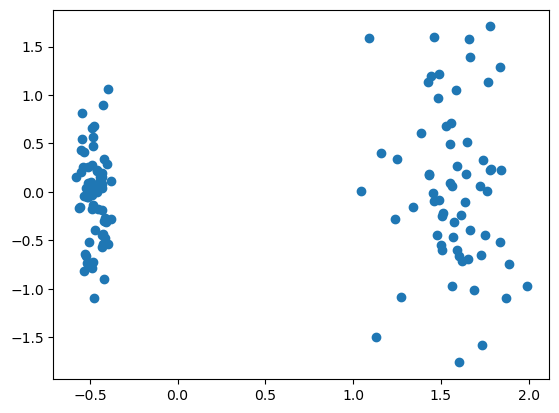

In [30]:
sample = vae.draw_sample()
plt.scatter(sample[:,0].detach().numpy(),sample[:,1].detach().numpy())
plt.show()

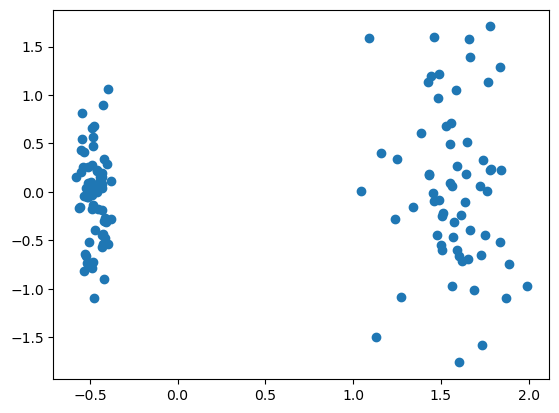

In [31]:
plt.scatter(sample[:,0].detach().numpy(),sample[:,1].detach().numpy())
plt.show()

In [1]:
from utility.data_io import load_data_no_y
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

C:\ProgramData\Miniconda3\envs\DataAugmentationVAE\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_set = load_data_no_y('dataset',0)

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(orig_data_df)


reduced_data = pca.transform(orig_data_df)

C:\ProgramData\Miniconda3\envs\DataAugmentationVAE\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


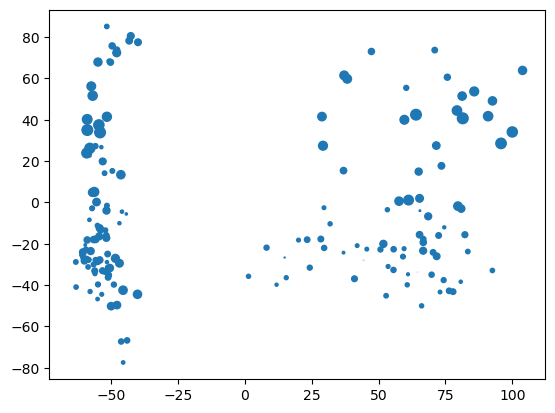

In [48]:
plt.scatter(reduced_data[:,0],reduced_data[:,1],reduced_data[:,2])
plt.show()

In [12]:
#x_train = DataLoader(train_set[train_index], batch_size=4, shuffle=True)
list(DataLoader(train_set[train_index],batch_size=32,shuffle=True))

[tensor([[[43.1034, 45.2790,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000, 42.5966,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [99.1667, 85.5150, 22.0020,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000, 29.0773, 77.9541,  ...,  1.0000,  0.0000,  0.0000],
          [61.2069, 41.8455, 62.8236,  ...,  1.0000,  0.0000,  0.0000],
          [ 0.0000, 15.9871, 62.8236,  ...,  1.0000,  0.0000,  0.0000]]])]

In [89]:
TensorDataset(torch.from_numpy(np.array([1,2,3,4,5,6,7])).float())

In [92]:
for x in x_train:
    print(x)

RuntimeError: stack expects each tensor to be equal size, but got [258, 11] at entry 0 and [258] at entry 1

In [30]:
len(list(train_set))

292

In [32]:
len(list(test_set))

30

In [44]:
list(train_set)[:]

[(tensor([ 0.0000, 16.0944, 50.8236, 35.4033, 76.4706, 41.8743, 86.7520,  0.0000,
           0.0000,  1.0000,  0.0000]),
  tensor(86.7520)),
 (tensor([ 0.0000, 25.1073, 61.3602, 36.9019, 82.3529, 72.9537, 87.0145,  1.0000,
           0.0000,  0.0000,  0.0000]),
  tensor(87.0145)),
 (tensor([75.0000, 73.6051, 68.7525, 34.1008, 17.6471, 58.8375,  5.7756,  1.0000,
           0.0000,  0.0000,  0.0000]),
  tensor(5.7756)),
 (tensor([59.4971, 52.7897, 25.0646, 34.9261, 23.5294, 49.8221, 12.6034,  0.0000,
           0.0000,  0.0000,  1.0000]),
  tensor(12.6034)),
 (tensor([74.1667, 67.4893, 36.1429, 35.9079, 70.5882, 60.8541,  7.4282,  0.0000,
           0.0000,  0.0000,  1.0000]),
  tensor(7.4282)),
 (tensor([ 0.0000, 22.2103, 83.9169, 36.5967, 11.7647, 72.9537, 85.9824,  1.0000,
           0.0000,  0.0000,  0.0000]),
  tensor(85.9824)),
 (tensor([88.7931, 78.2189, 80.0812, 36.6301, 70.5882, 52.7877,  3.8399,  1.0000,
           0.0000,  0.0000,  0.0000]),
  tensor(3.8399)),
 (tensor([86.206